<a href="https://colab.research.google.com/github/widayatwidi/CNN-Malaria-Cells-Classification/blob/master/Model_Improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT FINAL BANGKIT**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/PROJECT_FINAL_BANGKIT/"

Baseline-CNN.ipynb  Dataset  Model  TEST-2.ipynb  Test-3.ipynb


**Start to code**

In [ ]:
# For data manipulation and visualization
# import all the library
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# For CNN model creation
import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

# For working with images
import os
import cv2
from PIL import Image

Using TensorFlow backend.


In [ ]:
SIZE = 300

In [ ]:
# import dataset

DATA_DIR = '/content/drive/My Drive/PROJECT_FINAL_BANGKIT/Dataset/cell_images/'


dataset = []
label = []

In [ ]:
parasitized_images = os.listdir(DATA_DIR + 'Parasitized/')

for i, image_name in enumerate(parasitized_images):
    
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Parasitized/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))



In [ ]:
uninfected_images = os.listdir(DATA_DIR + 'Uninfected/')

for i, image_name in enumerate(uninfected_images):
    
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Uninfected/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

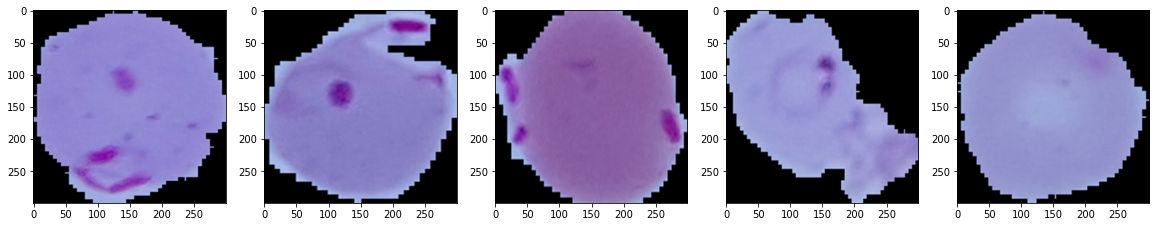

In [ ]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

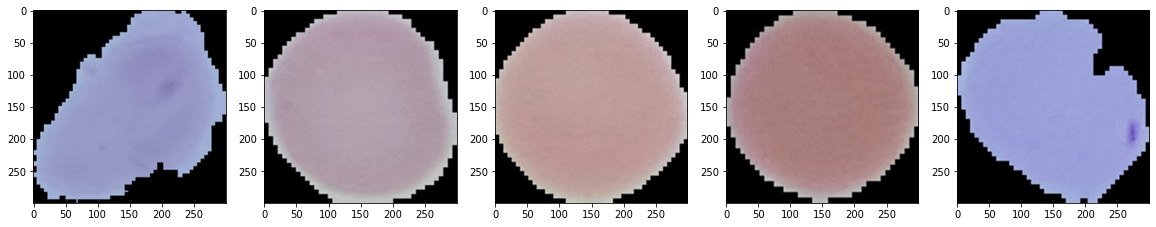

In [ ]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[len(parasitized_images) + image_index])

In [ ]:
#Improvement
classifier2 = None
classifier2 = Sequential()
classifier2.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier2.add(BatchNormalization(axis = -1))
classifier2.add(Dropout(0.2))

classifier2.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier2.add(BatchNormalization(axis = -1))
classifier2.add(Dropout(0.2))

classifier2.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier2.add(BatchNormalization(axis = -1))
classifier2.add(Dropout(0.2))

classifier2.add(Flatten())
classifier2.add(Dense(activation = 'relu', units=512))
classifier2.add(BatchNormalization(axis = -1))
classifier2.add(Dropout(0.5))
classifier2.add(Dense(activation = 'softmax', units=2))
classifier2.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(classifier2.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 63, 63, 32)        896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_44 (Batc (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_44 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_45 (Batc (None, 14, 14, 32)      

In [ ]:
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

In [ ]:
len(X_test)

1855

In [ ]:
history = classifier.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 32, 
                         verbose = 2, 
                         epochs = 10, 
                         validation_split = 0.3,
                         shuffle = False)

In [ ]:
print("Test_Accuracy: {:.2f}%".format(classifier2.evaluate(np.array(X_test), np.array(y_test))[1]*100))

1855/1855 [==============================] - 3s 1ms/step
Test_Accuracy: 96.39%


**Try improving with augmentation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1/255,
                                     zoom_range = 0.3,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     horizontal_flip = True,
                                     fill_mode ='nearest',
                                     rotation_range = 30)

test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(X_train),
                                       y_train,
                                       batch_size = 64,
                                       shuffle = False)

test_generator = test_generator.flow(np.array(X_test),
                                     y_test,
                                     batch_size = 64,
                                     shuffle = False)

In [ ]:
history = classifier2.fit_generator(train_generator,
                                   steps_per_epoch = len(X_train)/64,
                                   epochs = 45,
                                   shuffle = False)

Epoch 1/45
116/115 [==============================] - 43s 375ms/step - loss: 0.3627 - accuracy: 0.9060
Epoch 2/45
116/115 [==============================] - 43s 371ms/step - loss: 0.2397 - accuracy: 0.9241
Epoch 3/45
116/115 [==============================] - 43s 370ms/step - loss: 0.2090 - accuracy: 0.9289
Epoch 4/45
116/115 [==============================] - 43s 369ms/step - loss: 0.1922 - accuracy: 0.9374
Epoch 5/45
116/115 [==============================] - 43s 371ms/step - loss: 0.1807 - accuracy: 0.9397
Epoch 6/45
116/115 [==============================] - 43s 370ms/step - loss: 0.1720 - accuracy: 0.9412
Epoch 7/45
116/115 [==============================] - 43s 371ms/step - loss: 0.1709 - accuracy: 0.9447
Epoch 8/45
116/115 [==============================] - 43s 370ms/step - loss: 0.1716 - accuracy: 0.9432
Epoch 9/45
116/115 [==============================] - 44s 378ms/step - loss: 0.1705 - accuracy: 0.9444
Epoch 10/45
116/115 [==============================] - 43s 373ms/step - l

In [ ]:
print("Test_Accuracy(after augmentation): {:.2f}%".format(classifier.evaluate_generator(test_generator, steps = len(X_test), verbose = 1)[1]*100))

1855/1855 [==============================] - 171s 92ms/step
Test_Accuracy(after augmentation): 89.60%


In [ ]:
classifier.save('/content/drive/My Drive/PROJECT_FINAL_BANGKIT/Model/model-testing-1.h5')
# model.save('model/model-lstm.h5')
print("Model has created!")

Model has created!
